[108.94328551  99.4829246   79.66220278  70.60184187  61.84148096
  31.96039822  12.8396764    4.37931549   2.15517113]
[1.39786783 2.75326215 4.025      5.17444026 6.16665777 6.9715045
 7.5645256  7.92770241 8.05      ]


C:\Users\user\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


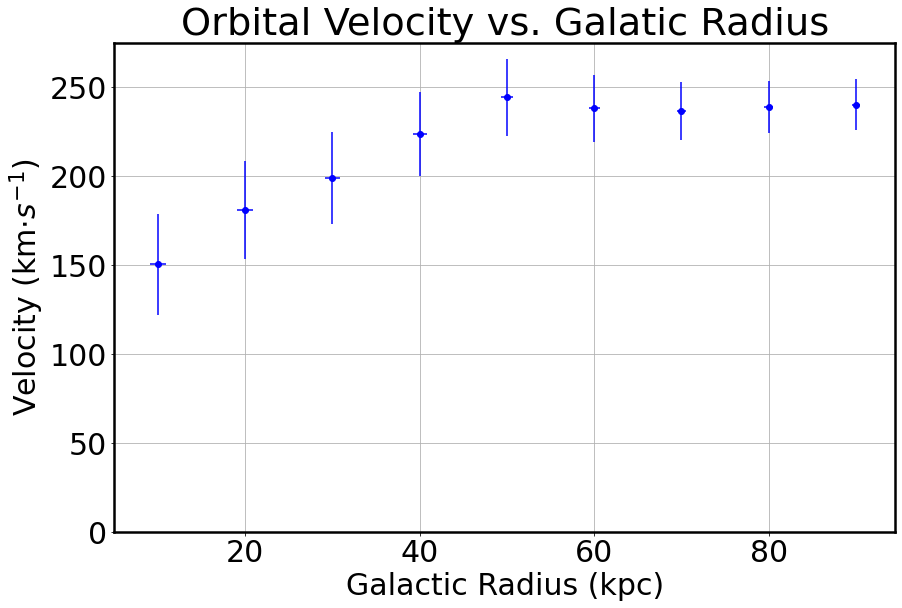

In [4]:
### Imports 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy.optimize as opt
import matplotlib.axes as axs 


### Data from SRT
longitude = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120])
vlsr = np.array([11.3, 10.6, 9.5, 8.2, 6.7, 4.9, 3.1, 1.1, -1.0, -3.0, -8.3])
fmin = np.array([1420.35, 1419.80, 1419.85, 1419.95, 1420.0, 1420.05, 
                 1420.20, 1420.30, 1420.35, 1420.37, 1420.0])
fmin = fmin + 0.04 ### from SRT recommendation 
c = 3.00 * 10 ** 5  ### speed of light in km/s 
vm = ((((1420.406 - fmin) * c) / 1420.406) - vlsr)
print(vm[1:10])

Vo = 238.0 ### km/s
Ro = 8.05 ### kpc
bw = 0.1207 ### beamwidth, rads


### Calculate Orbital Velocity, explained in "Geometry" section of write-up
sinl = np.sin(longitude * (np.pi / 180))
cosl = np.cos(longitude * (np.pi / 180))
verr = np.sqrt((1.65)**2 + (sinl * 14)**2 + (Vo* cosl * (bw))**2)
rerr = np.sqrt((0.45*sinl)**2 + (8.05*cosl*(bw))**2)
xdata = np.linspace(1.0, 8.5, 10000)

    

VR = Vo * sinl + vm 
R = Ro * sinl


verr = verr[1:10]
rerr = rerr[1:10]
longitude = longitude[1:10]
R = R[1:10]
print(R)
VR = VR[1:10]




fig  =  plt.figure(figsize=(14, 9))
plt.rcParams.update({'font.size': 30})
plt.ylabel(r'Velocity (km$\cdot s ^{-1}$)')
plt.xlabel(r'Galactic Radius (kpc)')
plt.ylim(0, 275)
plt.rcParams.update({'font.size': 32})
plt.title('Orbital Velocity vs. Galatic Radius')
plt.errorbar(longitude, VR, xerr = rerr, yerr = verr, fmt = 'o', color = 'blue')
plt.grid(axis='both')

ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2.5)
plt.savefig('grc.pdf')
plt.show()



[1.95496112e-20 9.31336941e-21 9.24217667e-22]


C:\Users\user\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


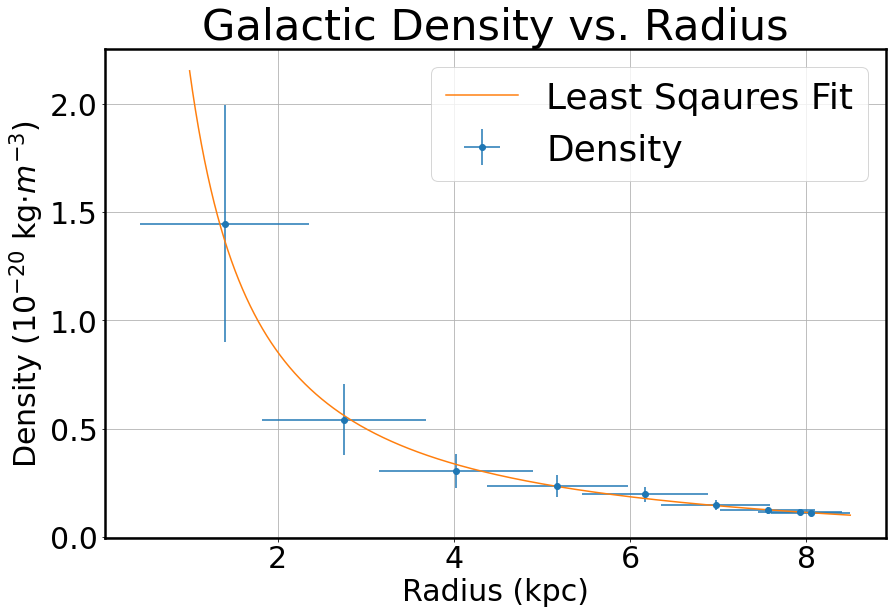

[ 0.71057584  1.53272034 -0.09001064]
[1.95496112e-20 9.31336941e-21 9.24217667e-22]


In [5]:
### Calculate mass distribution
G = 6.6743e-11
Vrho = VR * 1000 ### km/s to m/s
rhoRad = R * 3.086e+19 ### kpc to m
rho = (Vrho ** 2) / (4*np.pi*G*(rhoRad**2))
vrhoerr = verr  * 1000
rhoraderr = rerr* 3.086e+19
drho = np.sqrt(((2*Vrho / (4*np.pi*G*(rhoRad**2)))*vrhoerr) ** 2 + (((-2*Vrho / (4*np.pi*G*(rhoRad**3)))*rhoraderr) ** 2))


#### least squares fit
def func(x, a, b, c):
    return  a*(x**-2) + b*(x**-1) + c



rho1 = rho*10**20
drho1 = drho * 10**20 ### convert rho and drho from kg to kg^-20
popt, pcov = opt.curve_fit(func, R, rho1, sigma = drho, absolute_sigma = True)
perr = np.sqrt(np.diag(pcov)) #### From Scipy documentation, computes one standard deviation error on parameters
print(perr)
xdata = np.linspace(1.0, 8.5, 10000)
x = xdata * 3.086e+19

### Plot figure
fig = plt.figure(figsize=(14, 9))
plt.rcParams.update({'font.size': 30})
plt.ylabel(r'Density ($10^{-20}$ kg$\cdot m ^{-3}$)')
plt.xlabel(r'Radius (kpc)')
plt.rcParams.update({'font.size': 36})
plt.errorbar(R, rho1, xerr = rerr, yerr = drho1, fmt = 'o', label = 'Density')
plt.grid(axis='both')
plt.plot(xdata, func(xdata, *popt), label = 'Least Sqaures Fit')
plt.title('Galactic Density vs. Radius')
plt.legend()
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2.5)
plt.savefig('GalacticDensity.pdf')
plt.show()
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)









In [6]:
massrad = (Vrho ** 2) * rhoRad / G
dMr = np.sqrt((2*Vrho*rhoRad * vrhoerr / G) **2 + ((Vrho **2) * rhoraderr / G)**2  )
print(rhoRad)
print(rhoraderr)
print(massrad)
print(dMr)




[4.31382012e+19 8.49656701e+19 1.24211500e+20 1.59683226e+20
 1.90303059e+20 2.15140629e+20 2.33441260e+20 2.44648896e+20
 2.48423000e+20]
[2.96274220e+19 2.85738742e+19 2.68797674e+19 2.46430930e+19
 2.20146846e+19 1.92199500e+19 1.65970504e+19 1.46336678e+19
 1.38870000e+19]
[1.45951933e+40 4.16520824e+40 7.34491165e+40 1.19602440e+41
 1.69976658e+41 1.82701566e+41 1.95607128e+41 2.08965039e+41
 2.14669312e+41]
[1.14457830e+40 1.88733652e+40 2.48861576e+40 3.14765601e+40
 3.57195014e+40 3.32429946e+40 3.06376835e+40 2.86918744e+40
 2.79129756e+40]


0.1586211877992103 -0.1992244458675878
R-squared: 0.987246


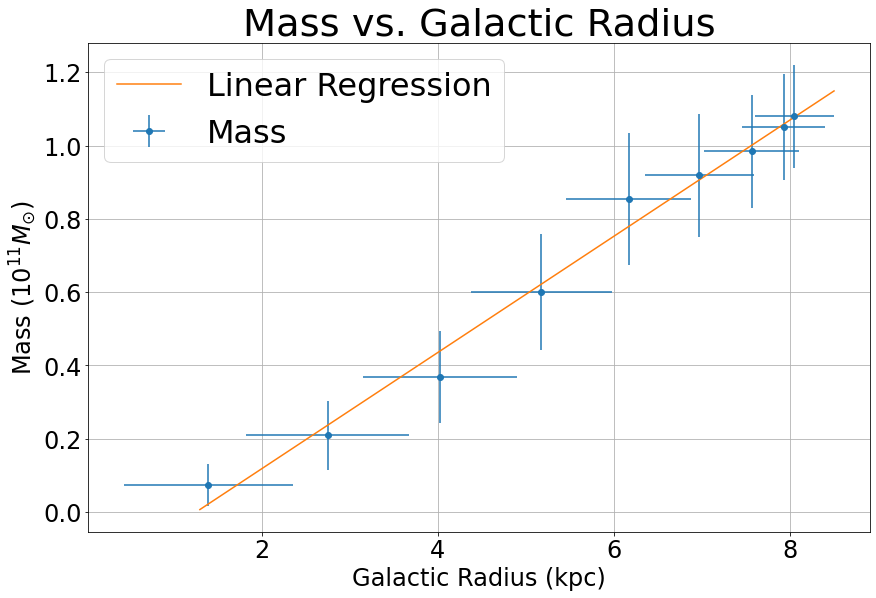

3.1476826166957497
0.14378078802388047


In [7]:
Mdot = 1.988e30 ####Solar mass in kg

xdata = xdata[400:9999]


slope, intercept, r_value, p_value, std_err = stat.linregress(R, massrad/(Mdot*10**11))
print(slope, intercept)
print("R-squared: %f" % r_value**2)
plt.figure(figsize=(14, 9))
plt.rcParams.update({'font.size': 24})
plt.ylabel(r'Mass ($10^{11}M_{\odot})$')
plt.xlabel(r'Galactic Radius (kpc)')
plt.rcParams.update({'font.size': 32})
plt.errorbar(R, massrad/(Mdot*10**11), xerr = rerr, yerr = dMr/(Mdot*10**11) , fmt = 'o', label = 'Mass')
plt.plot(xdata, intercept + slope*xdata, label='Linear Regression')
plt.legend()
plt.title('Mass vs. Galactic Radius')
plt.grid(axis='both')
plt.savefig('MGR.pdf')
plt.show()
print(slope*21.1 + intercept)
print(std_err*21.1)

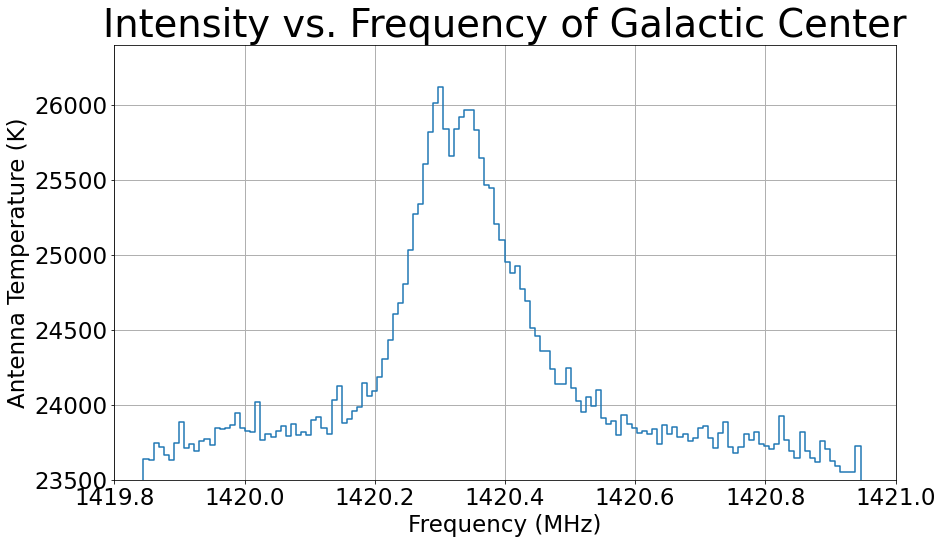

In [105]:
#### Imports
import numpy as np
import matplotlib.pyplot as plt

#### Assign file name.
fname = "Downloads\GRC_Data_Redo\IBPGC110120.rad"

#### From the SRT manual and inspection of our rad files, 
#### the first data point is in column 9, and for recording mode 4
#### we have 156 data points, so the data spans columns 9 to 165.
freqdata = np.loadtxt(fname, skiprows = 1, usecols = range(9, 165))



#### Calculate frequency for each bin, 0 bin frequency is 1419.79 MHz
start = np.loadtxt(fname, skiprows = 1, usecols=(5), max_rows=1)
df = np.loadtxt(fname, skiprows = 1, usecols=(6), max_rows=1) ### df as in "delta f", or frequency change per bin step
end = (155.*df)+start
bins = np.loadtxt(fname, skiprows = 1, usecols=(8), max_rows=1)
freqbins = np.linspace(start, end, 156)
val = np.mean(freqdata, axis=0)
c = 3 * 10**8 #### m/s
binmax = np.argmax(val)
freqmax = freqbins[binmax]


beamwidth = 1.2*(c / (freqmax * 10 ** 6)) / 2.1 #### SRT has 2.1m aperture. beamwidth in rads




plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 23})
plt.xlabel('Frequency (MHz)')
plt.ylabel('Antenna Temperature (K)')
plt.step(freqbins, val)
plt.xlim(1419.8, 1421.0)
plt.ylim(23500, 26400)
plt.rcParams.update({'font.size': 32})
plt.title('Intensity vs. Frequency of Galactic Center')
plt.grid(axis='both', linewidth=1)
#plt.vlines(1420.285, 15000, 22000)
plt.savefig('BeegGC.pdf')
plt.show()




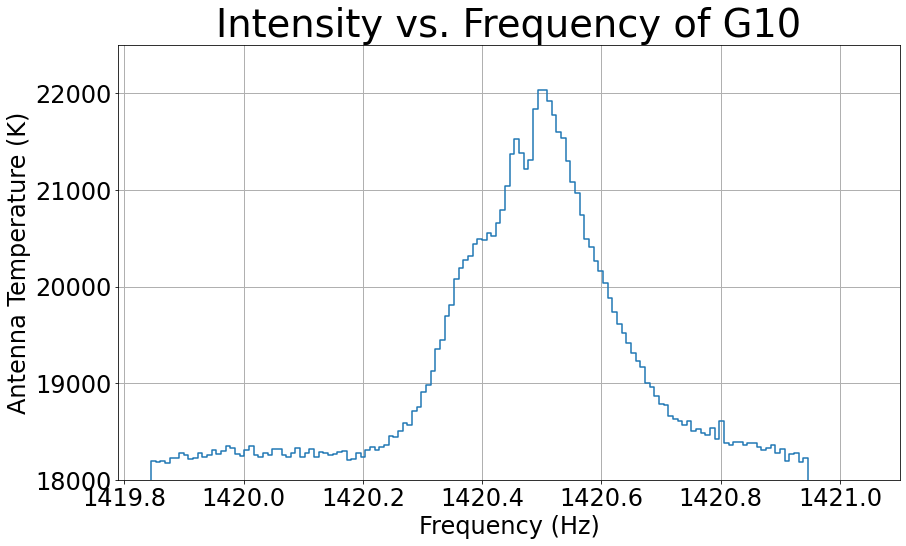

In [113]:


#### Assign file name.
fname = "Downloads\GRC_Data_Redo\IBPG10110120.rad"

#### From the SRT manual and inspection of our rad files, 
#### the first data point is in column 9, and for recording mode 4
#### we have 156 data points, so the data spans columns 9 to 165.
freqdata = np.loadtxt(fname, skiprows = 1, usecols = range(9, 165))



#### Calculate frequency for each bin, 0 bin frequency is 1419.79 MHz
start = np.loadtxt(fname, skiprows = 1, usecols=(5), max_rows=1)
df = np.loadtxt(fname, skiprows = 1, usecols=(6), max_rows=1)### df as in "delta f", or frequency change per bin step
end = (155.*df)+start
bins = np.loadtxt(fname, skiprows = 1, usecols=(8), max_rows=1)
freqbins = np.linspace(end, start, 156)
val10 = np.mean(freqdata, axis=0)
c = 3 * 10**8 #### m/s
binmax = np.argmax(val)
freqmax = freqbins[binmax]


beamwidth = 1.2*(c / (freqmax * 10 ** 6)) / 2.1 #### SRT has 2.1m aperture. beamwidth in rads


### Plot figure
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 24})
plt.xlabel('Frequency (Hz)')
plt.ylabel('Antenna Temperature (K)')
plt.step(freqbins, val10)
plt.xlim(1419.79, 1421.1)
plt.ylim(18000, 22500)
plt.rcParams.update({'font.size': 32})
plt.title('Intensity vs. Frequency of G10')
plt.grid(axis='both', linewidth=1)
plt.savefig('BeegG10.pdf')
plt.show()

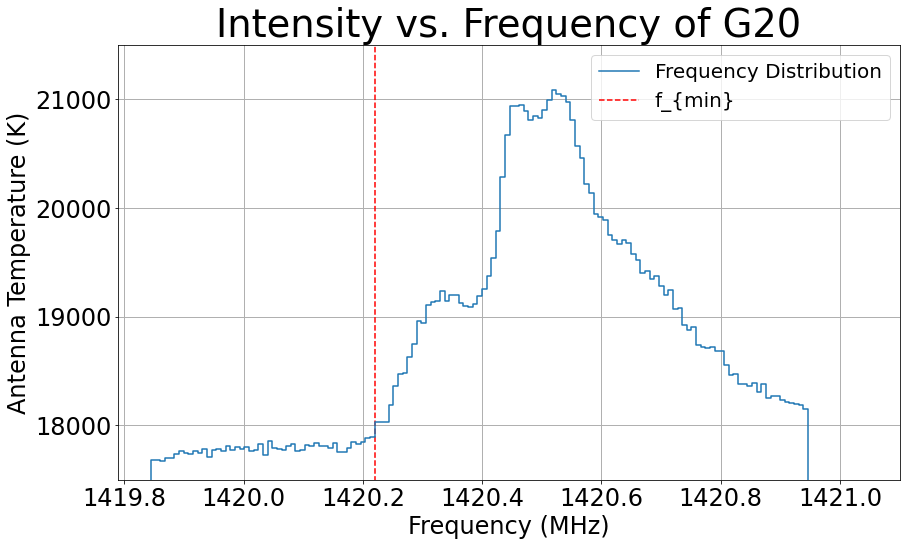

In [102]:

#### Assign file name.
fname = "Downloads\GRC_Data_Redo\IBPG20110120.rad"

#### From the SRT manual and inspection of our rad files, 
#### the first data point is in column 9, and for recording mode 4
#### we have 156 data points, so the data spans columns 9 to 165.
freqdata = np.loadtxt(fname, skiprows = 1, usecols = range(9, 165))



#### Calculate frequency for each bin, 0 bin frequency is 1419.79 MHz
start = np.loadtxt(fname, skiprows = 1, usecols=(5), max_rows=1)
df = np.loadtxt(fname, skiprows = 1, usecols=(6), max_rows=1) ### df as in "delta f", or frequency change per bin step
end = (155.*df)+start
bins = np.loadtxt(fname, skiprows = 1, usecols=(8), max_rows=1)
freqbins = np.linspace(end, start, 156)
val = np.mean(freqdata, axis=0)
c = 3 * 10**8 #### m/s
binmax = np.argmax(val)
freqmax = freqbins[binmax]


beamwidth = 1.2*(c / (freqmax * 10 ** 6)) / 2.1 #### SRT has 2.1m aperture. beamwidth in rads


### Plot figure
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 24})
plt.xlabel('Frequency (MHz)')
plt.ylabel('Antenna Temperature (K)')
plt.step(freqbins, val, label = 'Frequency Distribution')
plt.xlim(1419.79, 1421.1)
plt.ylim(17500, 21500)
plt.rcParams.update({'font.size': 32})
plt.title('Intensity vs. Frequency of G20')
plt.grid(axis='both', linewidth=1)
plt.vlines(1420.22, 15000, 22000, label=r'f_{min}', color = 'r', linestyles = 'dashed')
plt.legend(fontsize = 20)
plt.savefig('BeegG20.pdf')
plt.show()

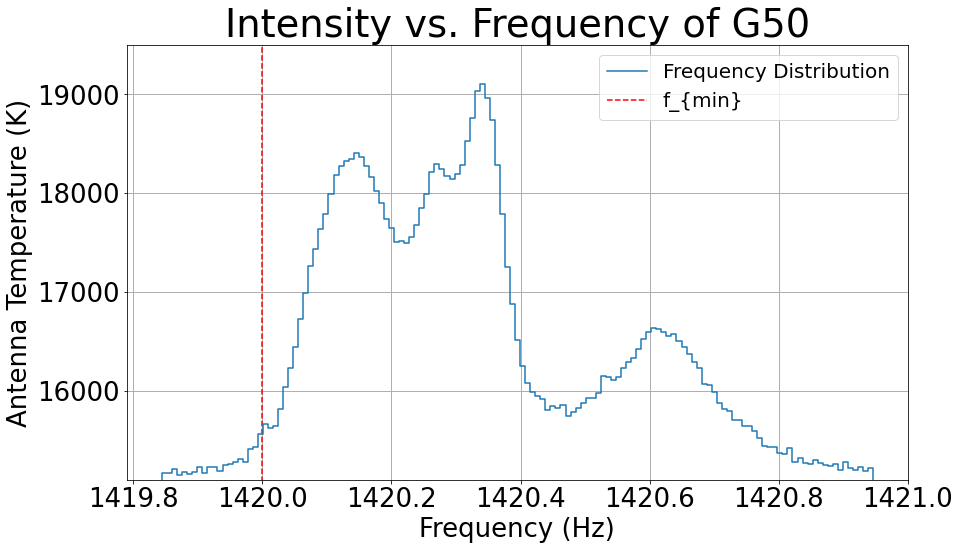

In [103]:

#### Assign file name.
fname = "Downloads\GRC_Data_Redo\IBPG50110120.rad"

#### From the SRT manual and inspection of our rad files, 
#### the first data point is in column 9, and for recording mode 4
#### we have 156 data points, so the data spans columns 9 to 165.
freqdata = np.loadtxt(fname, skiprows = 1, usecols = range(9, 165))



#### Calculate frequency for each bin, 0 bin frequency is 1419.79 MHz
start = np.loadtxt(fname, skiprows = 1, usecols=(5), max_rows=1)
df = np.loadtxt(fname, skiprows = 1, usecols=(6), max_rows=1) ### df as in "delta f", or frequency change per bin step
end = (155.*df)+start
bins = np.loadtxt(fname, skiprows = 1, usecols=(8), max_rows=1)
freqbins = np.linspace(start, end, 156)
val50 = np.mean(freqdata, axis=0)
c = 3 * 10**8 #### m/s
binmax = np.argmax(val)
freqmax = freqbins[binmax]


beamwidth = 1.2*(c / (freqmax * 10 ** 6)) / 2.1 #### SRT has 2.1m aperture. beamwidth in rads


### Plot figure
plt.figure(figsize=(14,8))
plt.vlines(1420.0, 15000, 22000, label=r'f_{min}', color = 'r', linestyles = 'dashed')
plt.step(freqbins, val50, label = 'Frequency Distribution')
plt.rcParams.update({'font.size': 20})
plt.legend()
plt.xlabel('Frequency (Hz)', fontsize = 26)
plt.xticks(fontsize = 26)
plt.ylabel('Antenna Temperature (K)', fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlim(1419.79, 1421.0)
plt.ylim(15100, 19500)
plt.rcParams.update({'font.size': 32})
plt.title('Intensity vs. Frequency of G50')
plt.grid(axis='both', linewidth=1)
plt.savefig('Beeg50.pdf')
plt.show()